In [41]:
import torch
import torchvision
import os 
import pyrootutils
from tqdm.auto import tqdm
from PIL import Image
from torchvision import transforms
from data_setup import get_data_loaders
from utils import save_checkpoint, load_checkpoint, predict_plot_image
from train import train_model, train_step
from model import VisionTransformer
from imageio import imread

NUM_WORKERS = os.cpu_count()
device = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 2
BATCH_SIZE = 32
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
# path = 
# path = pyrootutils.find_root(__file__, indicator=".project-root")
# data_dir = path / "data" / "food-101-tiny"
# data_dir = ".../data/food-101-tiny"
path = "C:/Users/Gia Phong/Downloads/ViT"
data_dir = "C:/Users/Gia Phong/Downloads/ViT/data/food-101-tiny"
train_dir = data_dir + "/train"
test_dir = data_dir + "/valid"
model_dir = path + "/models"


In [28]:
device

'cpu'

In [29]:
data_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

train_dataloader, test_dataloader, classes = get_data_loaders(train_dir, test_dir,
                                                              data_transform, BATCH_SIZE, NUM_WORKERS)

len(classes), type(classes)

(10, list)

In [42]:
vit = VisionTransformer(img_size=224, in_channels=3, patch_size=16, emb_dim=768, 
                            n_heads=12, mlp_size=3072, num_transformer_layers=12, 
                            num_classes=10, dropout=0.1).to(device)

optimizer = torch.optim.Adam(vit.parameters(), lr=3e-2, betas=(0.9, 0.999), weight_decay=0.3)
loss_fn = torch.nn.CrossEntropyLoss()

In [31]:
first_save = model_dir + "/vit.pt"
vit2 = load_checkpoint(vit, model_save_path=first_save)

[INFO] Loading model from: C:/Users/Gia Phong/Downloads/ViT/models/vit.pt


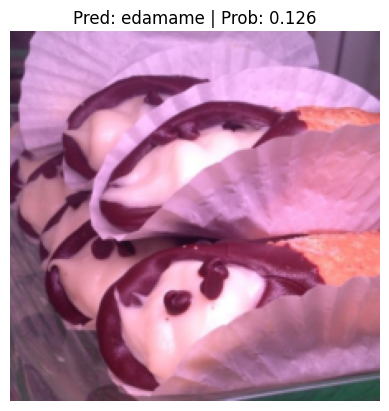

In [34]:
test_image_path = test_dir + "/cannoli/1266692.jpg"
predict_plot_image(model=vit, image_path=test_image_path, 
                   class_names=classes, 
                   transform=data_transform)

In [ ]:
vit2 = load_checkpoint(vit, model_dir + "/vit.pt")
train_model(vit, train_dataloader, test_dataloader, optimizer, loss_fn, EPOCHS, device)

[INFO] Loading model from: C:/Users/Gia Phong/Downloads/ViT/models/vit.pt
Training model...



 50%|█████     | 1/2 [18:38<18:38, 1118.53s/it]

Epoch: 1 | train_loss: 12.5948 | train_acc: 0.1101 | test_loss: 4.6510 | test_acc: 0.0977


100%|██████████| 2/2 [37:18<00:00, 1119.48s/it]

Epoch: 2 | train_loss: 2.4071 | train_acc: 0.0961 | test_loss: 2.3156 | test_acc: 0.0977


{'train_loss': [12.594774438979778, 2.407092977077403],
 'train_acc': [0.11008738601823709, 0.09612462006079028],
 'test_loss': [4.650964077562094, 2.315646395087242],
 'test_acc': [0.09765625, 0.09765625]}

In [ ]:
save_checkpoint(vit, path + "/models", "vit2.pt")

[INFO] Saving model to: C:\Users\Gia Phong\Downloads\ViT\models\vit2.pt


In [ ]:
vit_2 = VisionTransformer(img_size=224, in_channels=3, patch_size=16, emb_dim=768,
                            n_heads=12, mlp_size=3072, num_transformer_layers=12,
                            num_classes=10, dropout=0.1).to(device)

In [ ]:
load_checkpoint(vit_2, model_dir + "/vit2.pt")

[INFO] Loading model from: C:/Users/Gia Phong/Downloads/ViT/models/vit2.pt


In [ ]:
vit_2.state_dict()

OrderedDict([('class_embedding',
              tensor([[[ 3.6325e-01,  3.9870e-01,  3.1912e-03,  4.3597e-01,  1.9482e-03,
                         1.1446e-01, -4.1339e-03,  2.8290e-01,  4.1666e-01, -1.0607e-04,
                         4.1079e-01,  1.1058e-01,  3.4810e-01,  9.2457e-02,  2.3345e-01,
                         1.4153e-02,  3.6676e-01,  9.8107e-02, -2.3659e-03,  1.4242e-01,
                        -1.6936e-04,  2.3865e-02, -2.3562e-03,  3.1790e-01, -8.9180e-04,
                         2.0155e-04,  2.4487e-03,  2.2771e-03,  8.0091e-02, -1.1546e-04,
                         4.3147e-01,  4.1929e-03,  3.6539e-01,  1.0765e-01, -8.7984e-04,
                         2.9534e-01,  1.0711e-01,  3.8420e-01,  8.2714e-02,  9.2967e-04,
                         1.4578e-01,  5.9708e-03,  2.0853e-01,  4.2194e-01,  2.7675e-01,
                        -1.2433e-03,  2.7894e-01,  1.1220e-01,  2.4271e-01,  1.5831e-04,
                         3.3292e-03,  4.2112e-03, -6.4891e-03,  3.9212e-01,  

In [ ]:
train_model(vit_2, train_dataloader, test_dataloader, optimizer, loss_fn, EPOCHS, device)

Training model...



 50%|█████     | 1/2 [17:20<17:20, 1040.34s/it]

Epoch: 1 | train_loss: 2.3162 | train_acc: 0.0992 | test_loss: 2.3138 | test_acc: 0.0957


100%|██████████| 2/2 [34:26<00:00, 1033.15s/it]

Epoch: 2 | train_loss: 2.3162 | train_acc: 0.0986 | test_loss: 2.3137 | test_acc: 0.0957


{'train_loss': [2.316249446665987, 2.31622828321254],
 'train_acc': [0.09916413373860182, 0.09859422492401215],
 'test_loss': [2.3138061314821243, 2.3137454986572266],
 'test_acc': [0.095703125, 0.095703125]}

In [ ]:
save_checkpoint(vit_2, path + "/models", "vit3.pt")

[INFO] Saving model to: C:\Users\Gia Phong\Downloads\ViT\models\vit3.pt


In [35]:
vit3 = VisionTransformer(img_size=224, in_channels=3, patch_size=16, emb_dim=768,
                            n_heads=12, mlp_size=3072, num_transformer_layers=12,
                            num_classes=10, dropout=0.1).to(device)

In [36]:
load_checkpoint(vit3, model_dir + "/vit3.pt")

[INFO] Loading model from: C:/Users/Gia Phong/Downloads/ViT/models/vit3.pt


In [37]:
train_model(vit3, train_dataloader, test_dataloader, optimizer, loss_fn, EPOCHS, device)

Training model...



 50%|█████     | 1/2 [09:20<09:20, 560.94s/it]

Epoch: 1 | train_loss: 2.3175 | train_acc: 0.0990 | test_loss: 2.3140 | test_acc: 0.0977


100%|██████████| 2/2 [18:41<00:00, 560.83s/it]

Epoch: 2 | train_loss: 2.3162 | train_acc: 0.0980 | test_loss: 2.3140 | test_acc: 0.0977


{'train_loss': [2.317519783973694, 2.316210816303889],
 'train_acc': [0.09895833333333333, 0.09802827380952382],
 'test_loss': [2.314021557569504, 2.314018815755844],
 'test_acc': [0.09765625, 0.09765625]}

In [38]:
save_checkpoint(vit3, path + "/models", "vit4.pt")

[INFO] Saving model to: C:\Users\Gia Phong\Downloads\ViT\models\vit4.pt


In [39]:
vit4 = VisionTransformer(img_size=224, in_channels=3, patch_size=16, emb_dim=768,
                            n_heads=12, mlp_size=3072, num_transformer_layers=12,
                            num_classes=10, dropout=0.1).to(device)


In [40]:
load_checkpoint(vit4, model_dir + "/vit4.pt")

[INFO] Loading model from: C:/Users/Gia Phong/Downloads/ViT/models/vit4.pt


In [43]:
train_model(vit4, train_dataloader, test_dataloader, optimizer, loss_fn, EPOCHS, device)

Training model...



 50%|█████     | 1/2 [08:44<08:44, 524.89s/it]

Epoch: 1 | train_loss: 2.3168 | train_acc: 0.1006 | test_loss: 2.3140 | test_acc: 0.0977


100%|██████████| 2/2 [16:34<00:00, 497.16s/it]

Epoch: 2 | train_loss: 2.3169 | train_acc: 0.0990 | test_loss: 2.3140 | test_acc: 0.0977


{'train_loss': [2.3168486654758453, 2.3169325391451516],
 'train_acc': [0.10063244047619048, 0.09895833333333333],
 'test_loss': [2.3140118420124054, 2.3140150606632233],
 'test_acc': [0.09765625, 0.09765625]}